In [ ]:
install.packages("igraph")
install.packages("pracma", repos="http://R-Forge.R-project.org")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
install.packages("matrixStats")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library('igraph')
library('Matrix')
library('pracma')


Attaching package: ‘igraph’


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union



Attaching package: ‘pracma’


The following objects are masked from ‘package:Matrix’:

    expm, lu, tril, triu




## **### 2. Random Walk on Networks**



1. Random walk on Erd¨os-R´enyi networks

(a) Create an undirected random network with 900 nodes, and the probability p for
drawing an edge between any pair of nodes equal to 0.015.

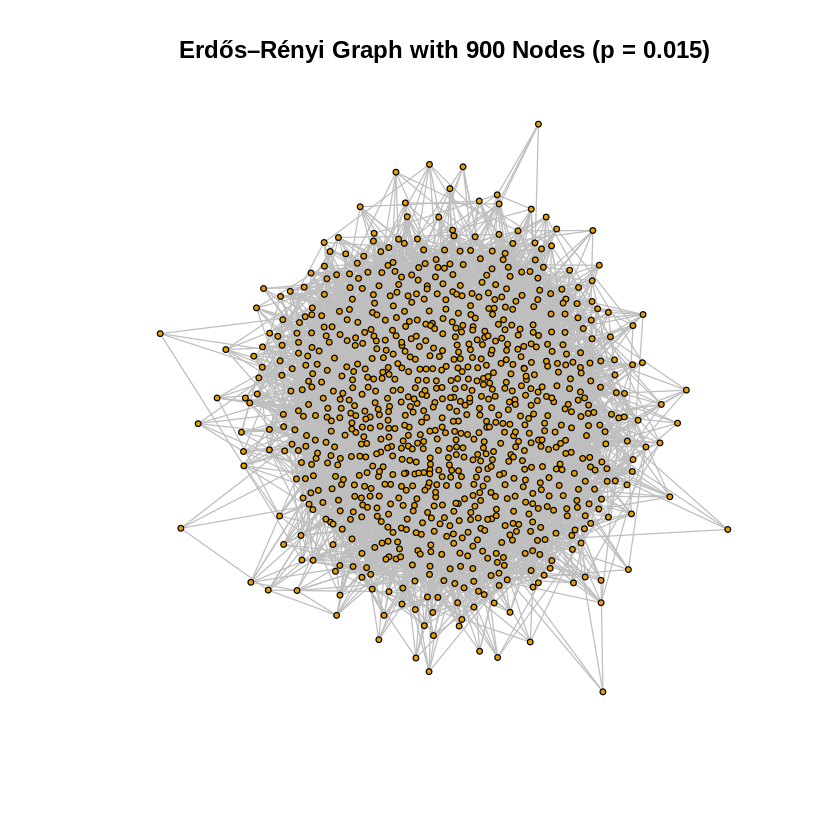

In [ ]:
# -------------------------------
# Q1(a)
# -------------------------------
n <- 900
p <- 0.015
er_graph <- sample_gnp(n = n, p = p, directed = FALSE)


plot(er_graph,
     vertex.label = NA,
     vertex.size = 2,
     edge.color = "gray",
     layout = layout_with_fr(er_graph),
     main = "Erdős–Rényi Graph with 900 Nodes (p = 0.015)")


(b) Let a random walker start from a randomly selected node (no teleportation). We
use t to denote the number of steps that the walker has taken. Measure the average
distance (defined as the shortest path length) ⟨s(t)⟩ of the walker from his starting
point at step t. Also, measure the variance σ2(t) = ⟨(s(t)−⟨s(t)⟩)2⟩ of this distance.
Plot ⟨s(t)⟩ v.s. t and σ2(t) v.s. t. Here, the average ⟨·⟩ is over random choices of the
starting nodes.

Warning message:
“`is.connected()` was deprecated in igraph 2.0.0.
ℹ Please use `is_connected()` instead.”


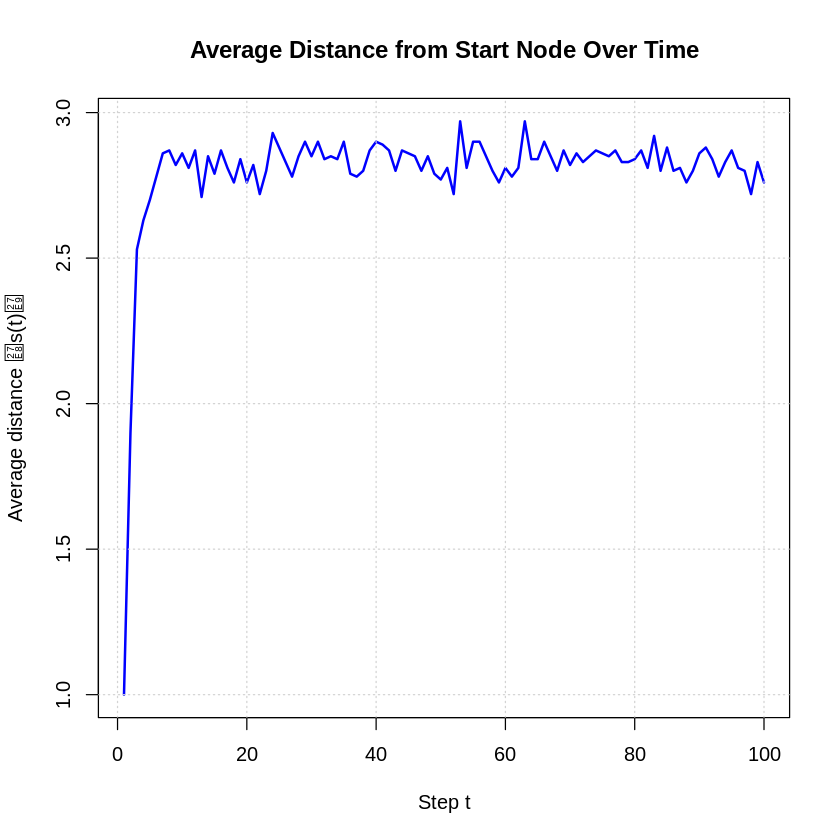

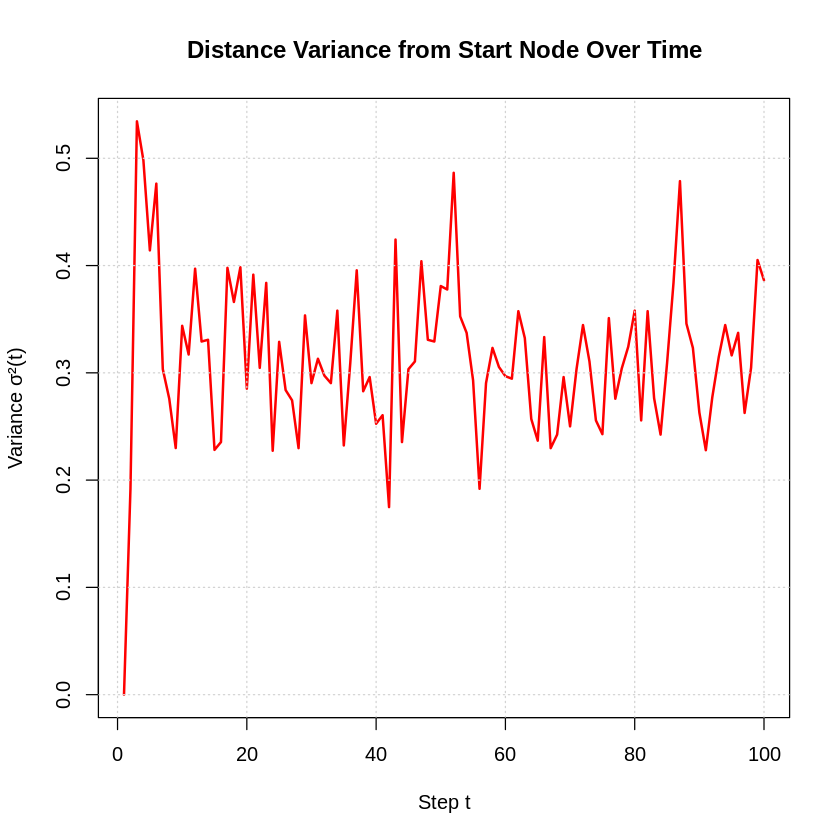

In [ ]:
# -------------------------------
# Q1(b)
# -------------------------------
if (!is.connected(er_graph)) {
  comps <- clusters(er_graph)
  gcc_index <- which.max(comps$csize)
  er_graph <- induced_subgraph(er_graph, which(comps$membership == gcc_index))
}

random_walk_distance <- function(graph, start_node, steps = 100) {
current_node <- start_node
dist_vec <- numeric(steps)

  for (t in 1:steps) {
    nbrs <- neighbors(graph, current_node)
    if (length(nbrs) == 0) {
      dist_vec[t:steps] <- NA
      break
    }
    next_node <- sample(nbrs, 1)
    d <- distances(graph, v = start_node, to = next_node)[1, 1]
    dist_vec[t] <- d
    current_node <- next_node
  }
  return(dist_vec)
}


set.seed(42)
num_walks <- 100
max_steps <- 100
walk_results <- matrix(NA, nrow = num_walks, ncol = max_steps)

for (i in 1:num_walks) {
  start <- sample(V(er_graph), 1)
  walk_results[i, ] <- random_walk_distance(er_graph, start, steps = max_steps)
}

avg_distance <- apply(walk_results, 2, mean, na.rm = TRUE)
var_distance <- apply(walk_results, 2, var, na.rm = TRUE)

plot(avg_distance, type = "l", lwd = 2, col = "blue",
     xlab = "Step t", ylab = "Average distance ⟨s(t)⟩",
     main = "Average Distance from Start Node Over Time")
grid()

plot(var_distance, type = "l", lwd = 2, col = "red",
     xlab = "Step t", ylab = "Variance σ²(t)",
     main = "Distance Variance from Start Node Over Time")
grid()


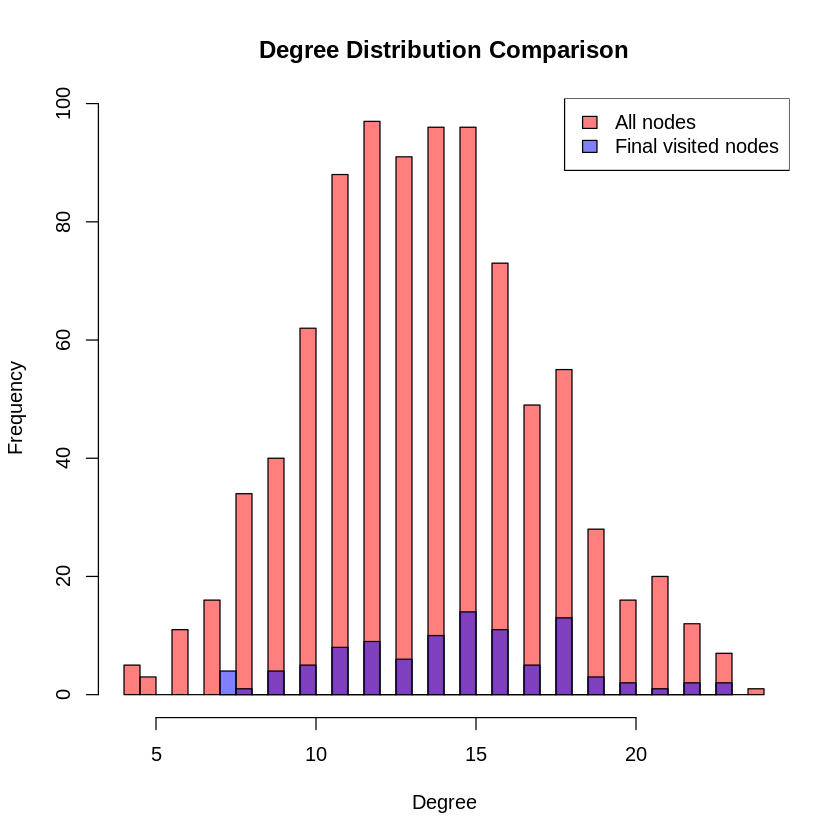

In [ ]:
# -------------------------------
# Q1(c)
# -------------------------------

random_walk_last_node <- function(graph, start_node, steps = 100) {
  current_node <- start_node
  for (t in 1:steps) {
    nbrs <- neighbors(graph, current_node)
    if (length(nbrs) == 0) {
      break
    }
    current_node <- sample(nbrs, 1)
  }
  return(current_node)
}


set.seed(42)
num_walks <- 100
final_nodes <- numeric(num_walks)

for (i in 1:num_walks) {
  start <- sample(V(er_graph), 1)
  final_nodes[i] <- random_walk_last_node(er_graph, start, steps = max_steps)
}

all_degrees <- degree(er_graph)

final_degrees <- degree(er_graph, v = final_nodes)

h_all <- hist(all_degrees, breaks = 40, plot = FALSE)
h_final <- hist(final_degrees, breaks = 40, plot = FALSE)
ymax <- max(c(h_all$counts, h_final$counts))

hist(all_degrees, breaks = 40, col = rgb(1, 0, 0, 0.5),
     main = "Degree Distribution Comparison",
     xlab = "Degree", ylim = c(0, ymax))

hist(final_degrees, breaks = 40, col = rgb(0, 0, 1, 0.5), add = TRUE)

legend("topright", legend = c("All nodes", "Final visited nodes"),
       fill = c(rgb(1, 0, 0, 0.5), rgb(0, 0, 1, 0.5)))


Number of nodes: 9000 
Number of edges: 606699 
Graph diameter: 3 


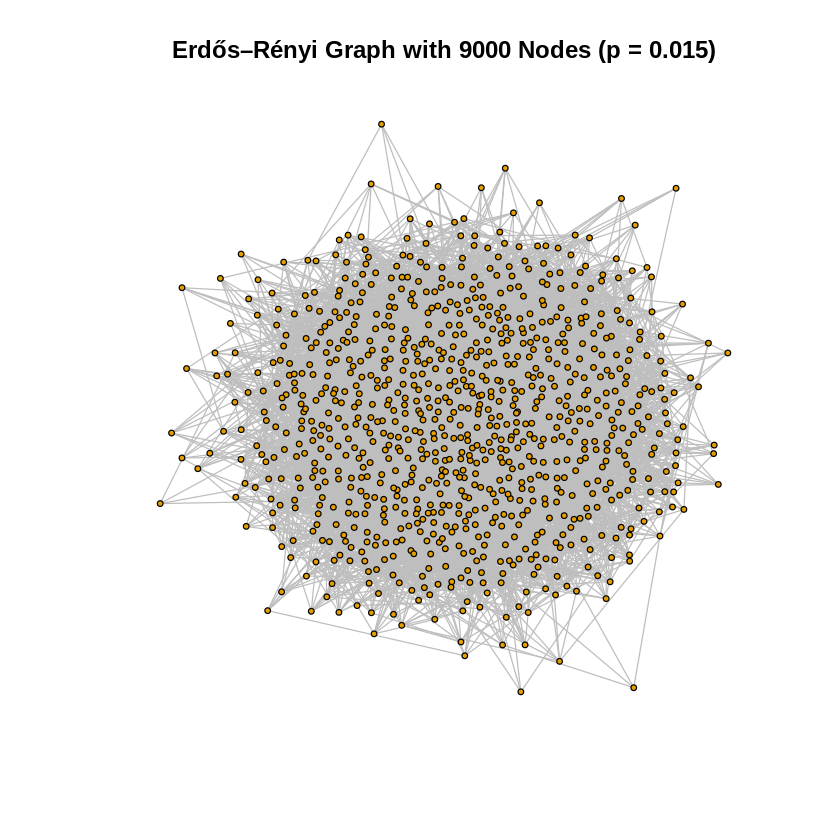

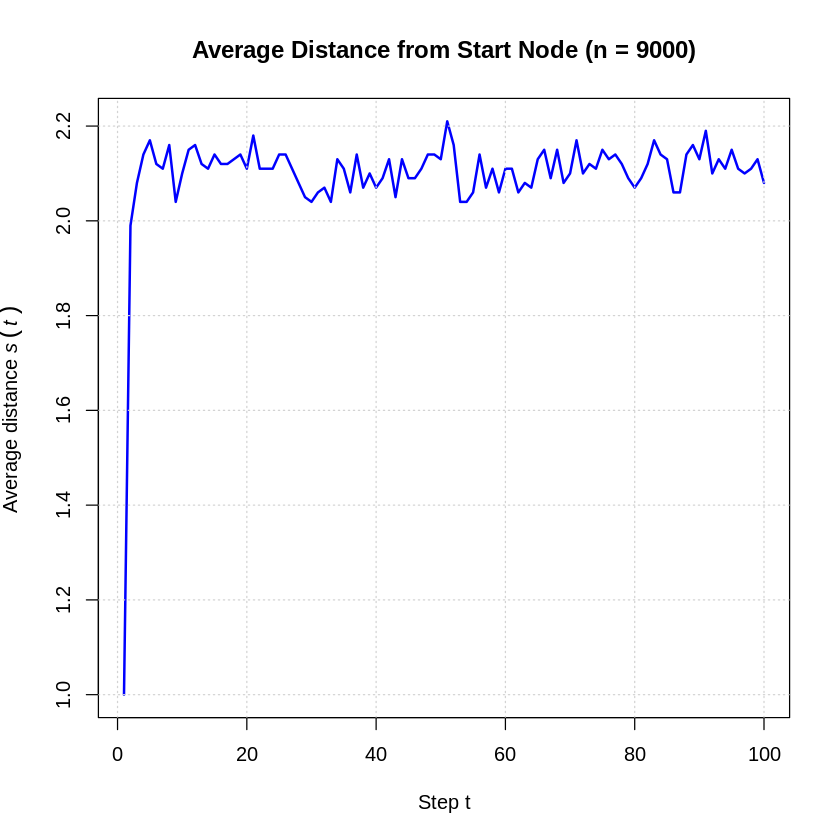

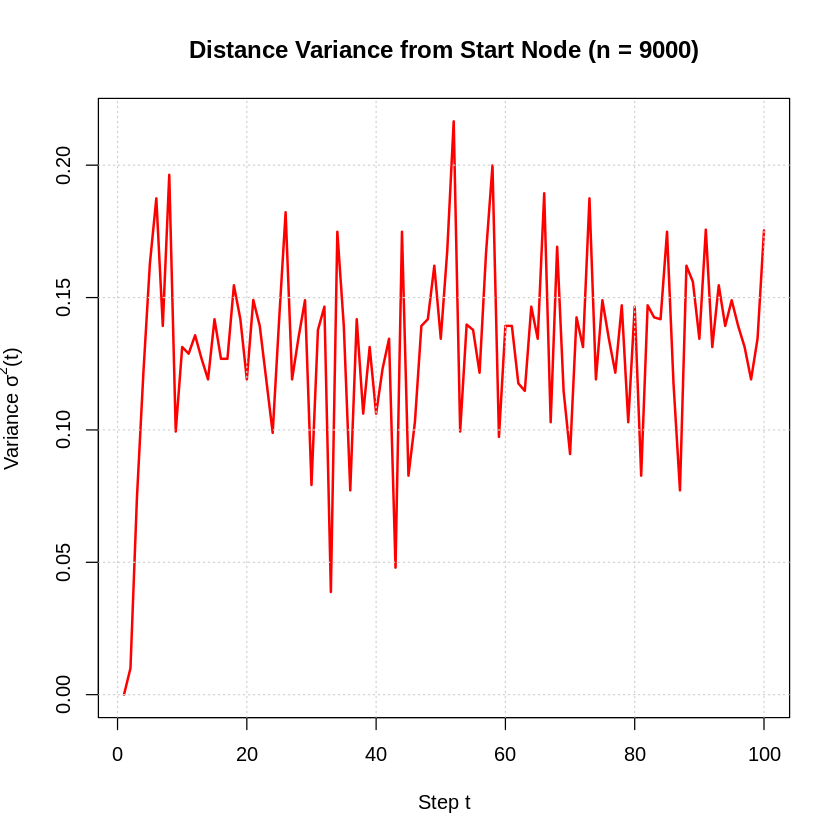

In [ ]:

# -------------------------------
# Q1(d)
# -------------------------------
n_large <- 9000
p <- 0.015
er_graph_large <- sample_gnp(n = n_large, p = p, directed = FALSE)

cat("Number of nodes:", vcount(er_graph_large), "\n")
cat("Number of edges:", ecount(er_graph_large), "\n")
plot(er_graph,
     vertex.label = NA,
     vertex.size = 2,
     edge.color = "gray",
     layout = layout_with_fr(er_graph),
     main = "Erdős–Rényi Graph with 9000 Nodes (p = 0.015)")

if (!is.connected(er_graph_large)) {
  comps <- clusters(er_graph_large)
  gcc_index <- which.max(comps$csize)
  er_graph_large <- induced_subgraph(er_graph_large, which(comps$membership == gcc_index))
  cat("Extracted GCC with", vcount(er_graph_large), "nodes.\n")
}

graph_diameter <- diameter(er_graph_large)
cat("Graph diameter:", graph_diameter, "\n")


random_walk_distance <- function(graph, start_node, steps = 100) {
  current_node <- start_node
  dist_vec <- numeric(steps)

  for (t in 1:steps) {
    nbrs <- neighbors(graph, current_node)
    if (length(nbrs) == 0) {
      dist_vec[t:steps] <- NA
      break
    }
    next_node <- sample(nbrs, 1)
    d <- distances(graph, v = start_node, to = next_node)[1, 1]
    dist_vec[t] <- d
    current_node <- next_node
  }
  return(dist_vec)
}


set.seed(42)
num_walks <- 100
max_steps <- 100
walk_results_large <- matrix(NA, nrow = num_walks, ncol = max_steps)

for (i in 1:num_walks) {
  start <- sample(V(er_graph_large), 1)
  walk_results_large[i, ] <- random_walk_distance(er_graph_large, start, steps = max_steps)
}

avg_distance_large <- apply(walk_results_large, 2, mean, na.rm = TRUE)
var_distance_large <- apply(walk_results_large, 2, var, na.rm = TRUE)


plot(1:max_steps, avg_distance_large, type = "l", lwd = 2, col = "blue",
     xlab = "Step t",
     ylab = expression(paste("Average distance ", italic(s(t)))),
     main = "Average Distance from Start Node (n = 9000)",
     xlim = c(1, max_steps))
grid()

plot(1:max_steps, var_distance_large, type = "l", lwd = 2, col = "red",
     xlab = "Step t",
     ylab = expression(paste("Variance ", sigma^2, "(t)")),
     main = "Distance Variance from Start Node (n = 9000)",
     xlim = c(1, max_steps))
grid()



Number of nodes: 900 
Number of edges: 899 
Is the graph connected? TRUE 


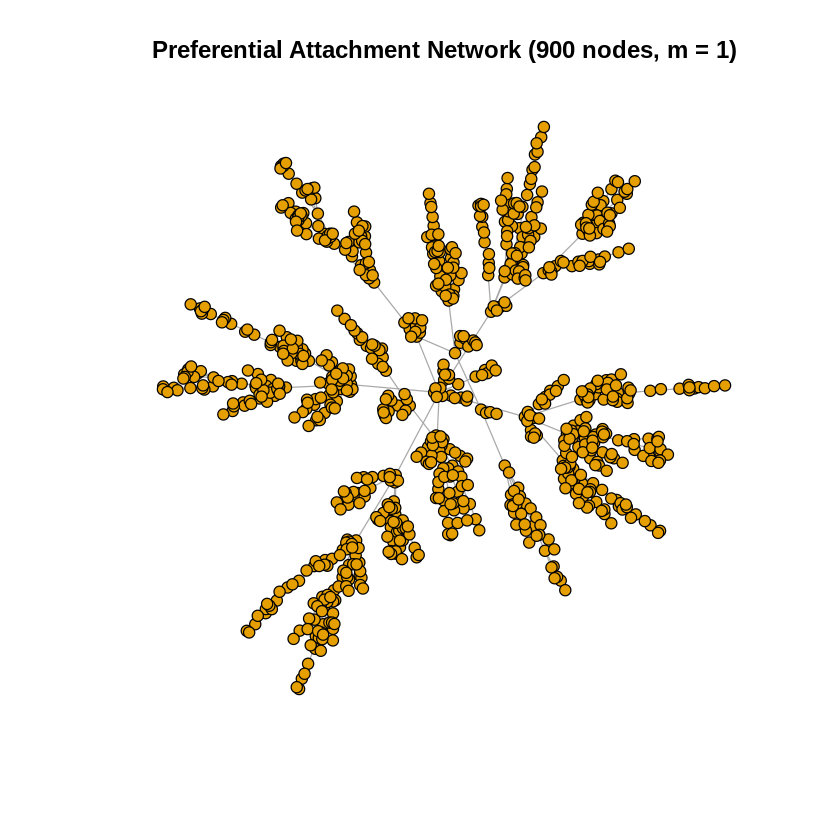

In [ ]:
# -------------------------------
# Q2(a): Generate an undirected preferential attachment network with 900 nodes, m = 1
# -------------------------------
pa_graph <- sample_pa(n = 900, m = 1, directed = FALSE)


cat("Number of nodes:", vcount(pa_graph), "\n")
cat("Number of edges:", ecount(pa_graph), "\n")
cat("Is the graph connected?", is.connected(pa_graph), "\n")


plot(pa_graph, vertex.label = "", vertex.size = 4,
     main = "Preferential Attachment Network (900 nodes, m = 1)")


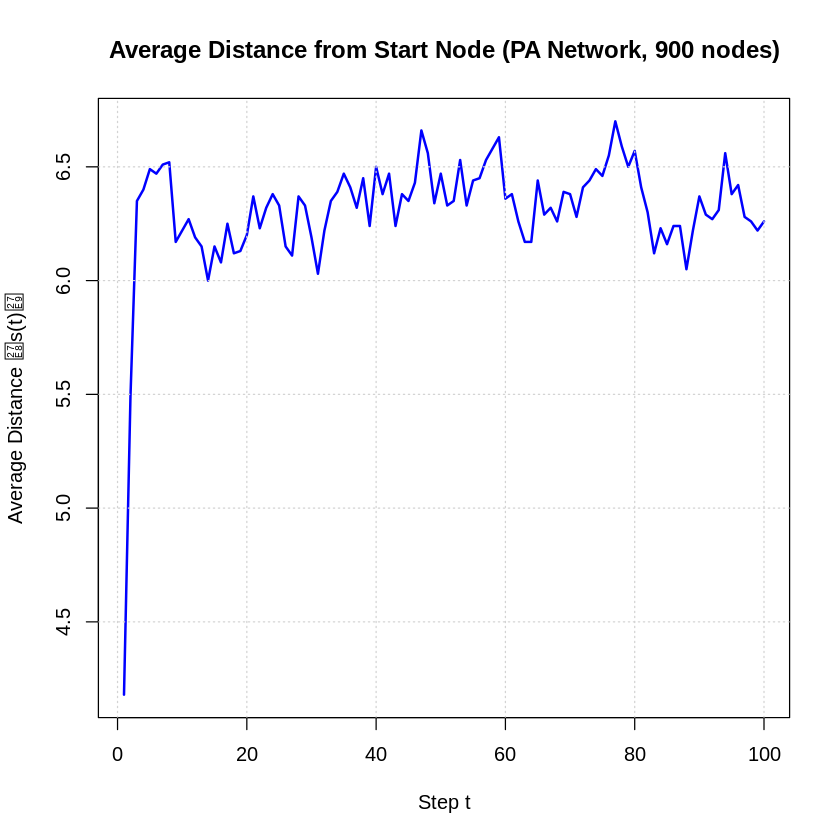

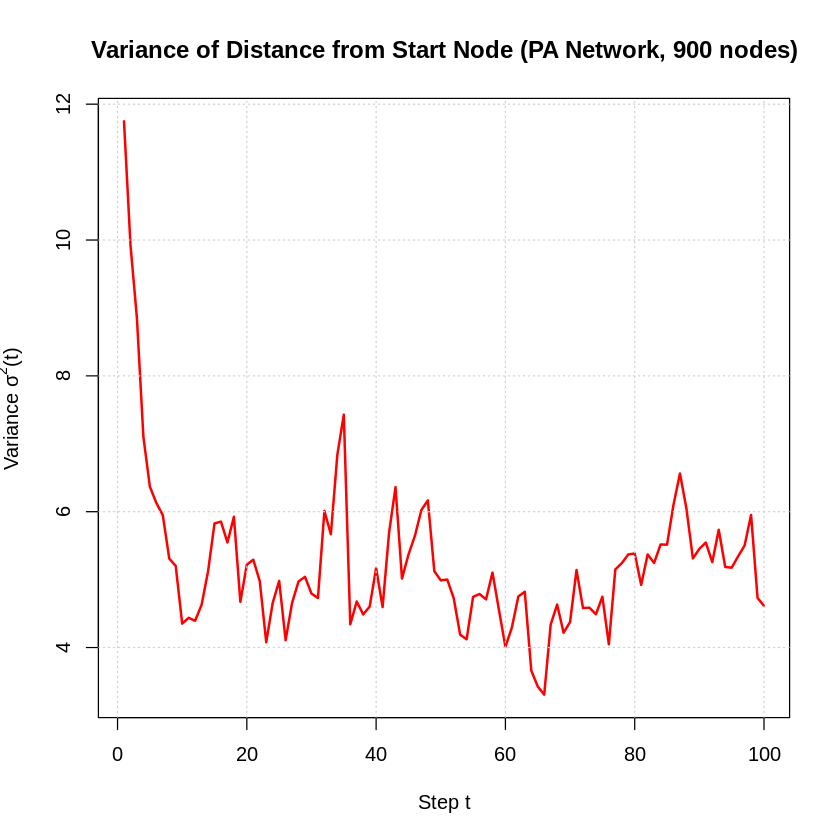

In [ ]:
# -------------------------------
# Q2(b): Random Walk on the PA Network
# -------------------------------

random_walk_distance <- function(graph, start_node, steps = 100) {
  current_node <- start_node
  dist_vec <- numeric(steps)

  for (t in 1:steps) {
    nbrs <- neighbors(graph, current_node)
    if (length(nbrs) == 0) {
      dist_vec[t:steps] <- NA
      break
    }
    next_node <- sample(nbrs, 1)

    d <- distances(graph, v = start_node, to = next_node)[1, 1]
    dist_vec[t] <- d
    current_node <- next_node
  }
  return(dist_vec)
}

set.seed(42)
num_walks <- 100
max_steps <- 100

walk_results <- matrix(NA, nrow = max_steps, ncol = num_walks)

for (i in 1:num_walks) {
  random_start <- sample(V(pa_graph), 1)
  walk_results[, i] <- random_walk_distance(pa_graph, random_start, steps = max_steps)
}

mean_distance <- rowMeans(walk_results, na.rm = TRUE)

variance_distance <- apply(walk_results, 1, function(x) {
  mean((x - mean(x, na.rm = TRUE))^2, na.rm = TRUE)
})

plot(1:max_steps, mean_distance, type = "l", lwd = 2, col = "blue",
     xlab = "Step t",
     ylab = "Average Distance ⟨s(t)⟩",
     main = "Average Distance from Start Node (PA Network, 900 nodes)",
     xlim = c(1, max_steps))
grid()

plot(1:max_steps, variance_distance, type = "l", lwd = 2, col = "red",
     xlab = "Step t",
     ylab = expression(paste("Variance ", sigma^2, "(t)")),
     main = "Variance of Distance from Start Node (PA Network, 900 nodes)",
     xlim = c(1, max_steps))
grid()




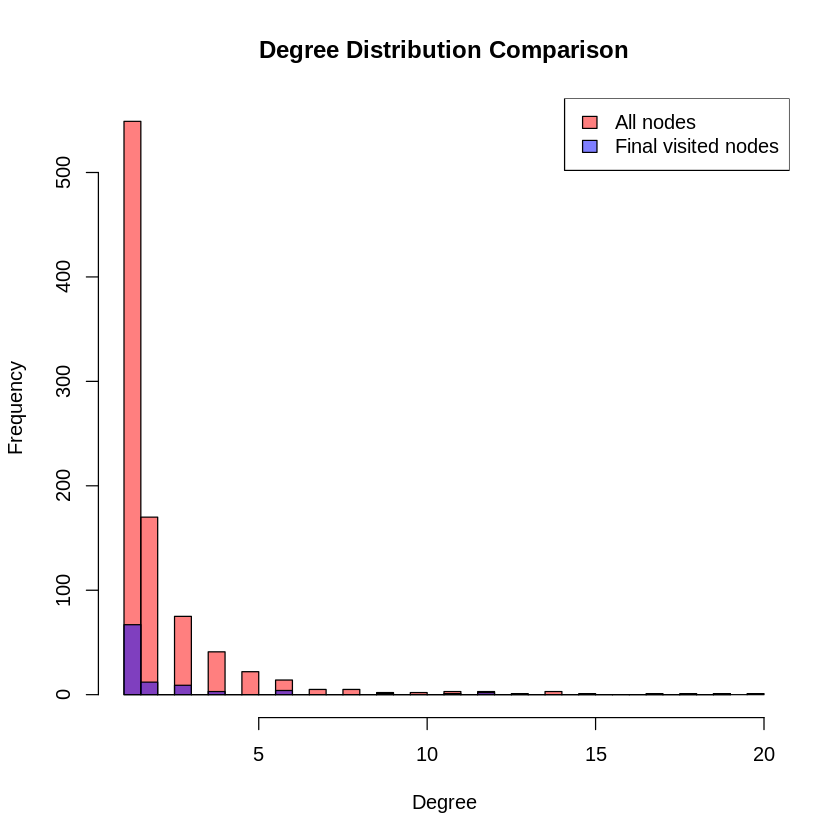

In [ ]:
# -------------------------------
# Q2(c): Compare Degree Distributions in PA Network
# -------------------------------

all_degrees <- degree(pa_graph)
final_degrees <- degree(pa_graph, v = final_nodes)

h_all <- hist(all_degrees, breaks = 40, plot = FALSE)
h_final <- hist(final_degrees, breaks = 40, plot = FALSE)
ymax <- max(c(h_all$counts, h_final$counts))


hist(all_degrees, breaks = 40, col = rgb(1, 0, 0, 0.5),
     main = "Degree Distribution Comparison",
     xlab = "Degree", ylim = c(0, ymax))


hist(final_degrees, breaks = 40, col = rgb(0, 0, 1, 0.5), add = TRUE)

legend("topright", legend = c("All nodes", "Final visited nodes"),
       fill = c(rgb(1, 0, 0, 0.5), rgb(0, 0, 1, 0.5)))

PA Network (n = 90):
  Number of nodes: 90 
  Number of edges: 89 
  Diameter: 13 

PA Network (n = 9000):
  Number of nodes: 9000 
  Number of edges: 8999 
  Diameter: 31 



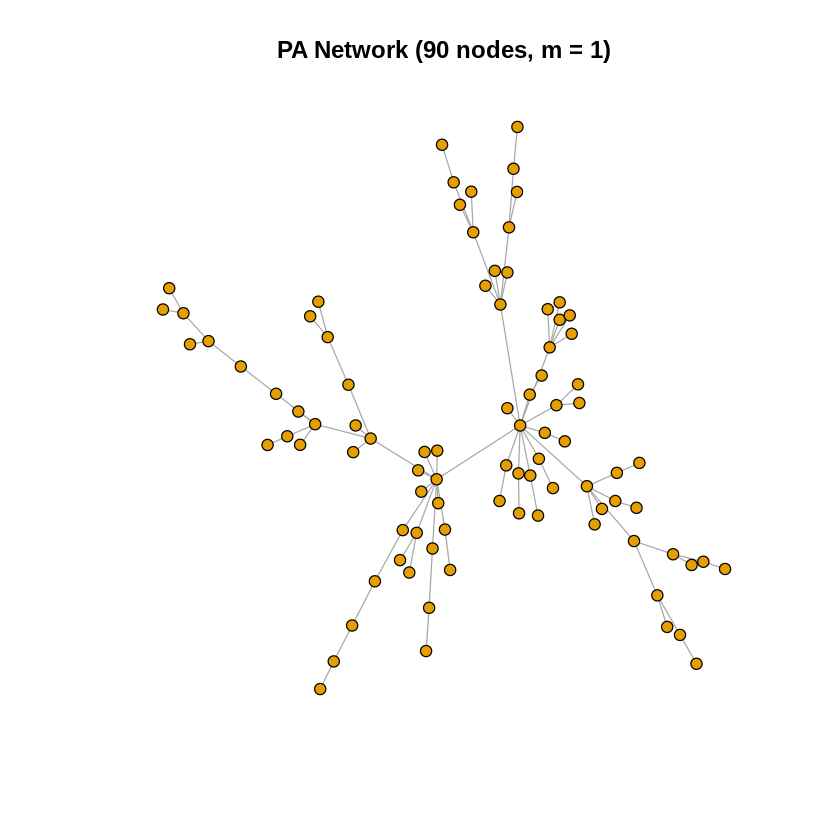

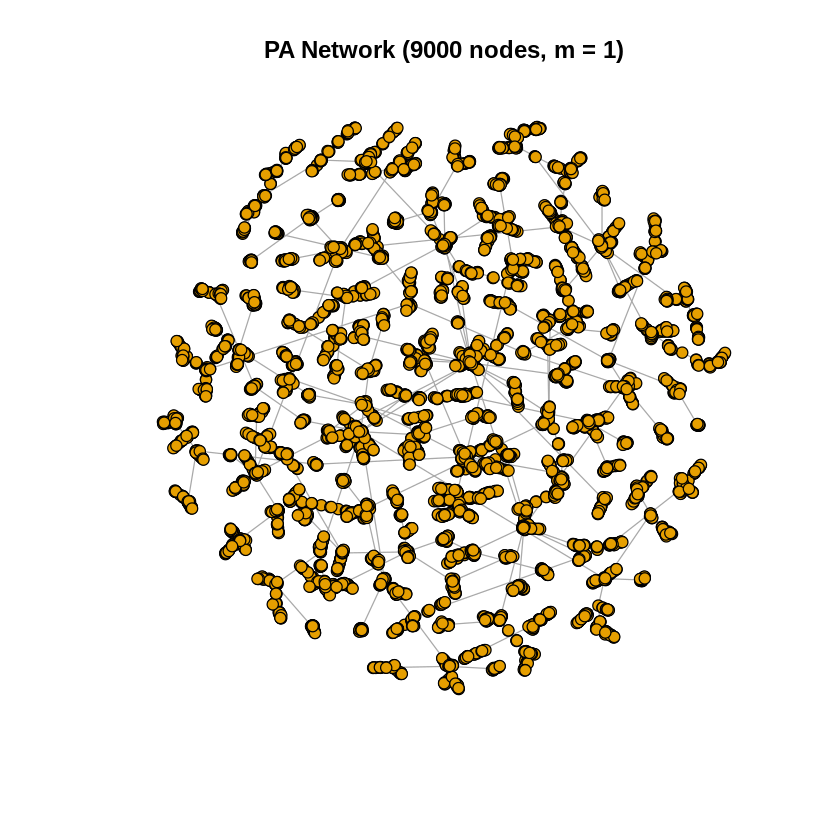

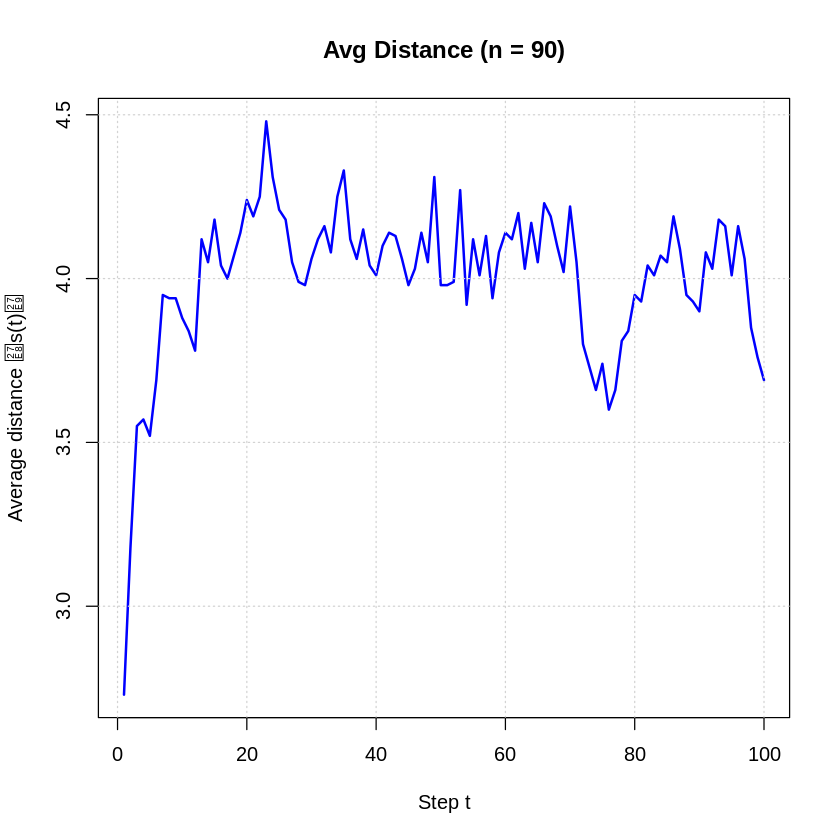

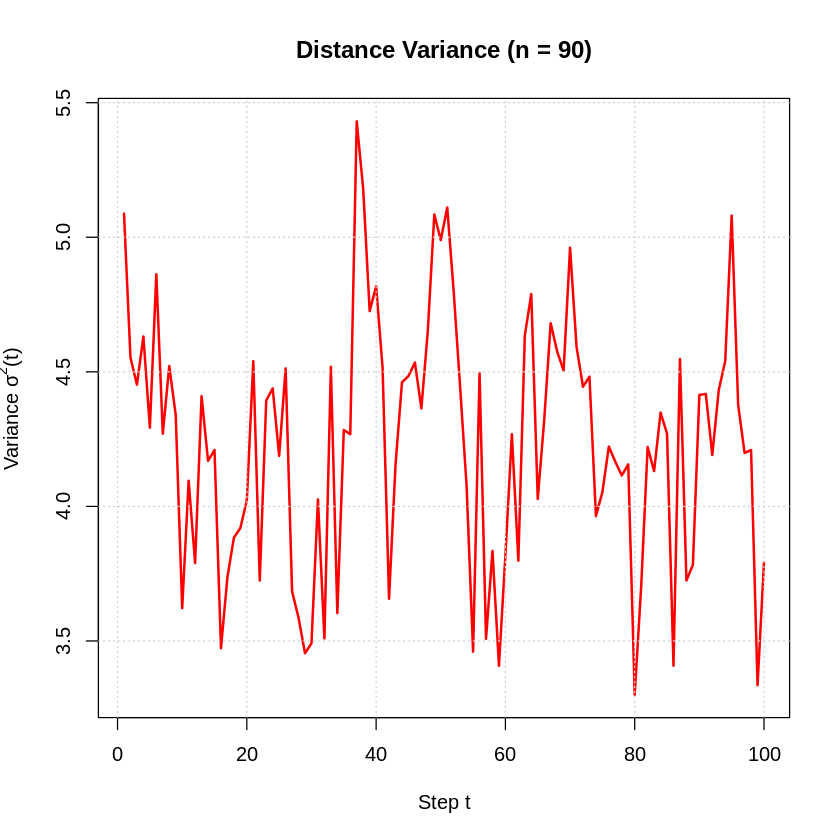

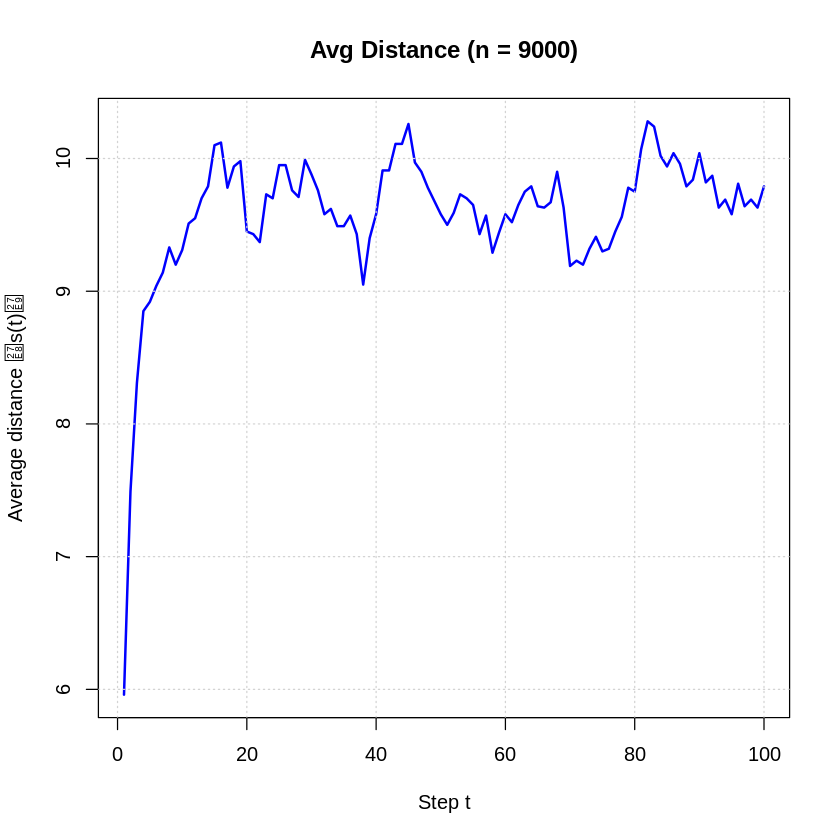

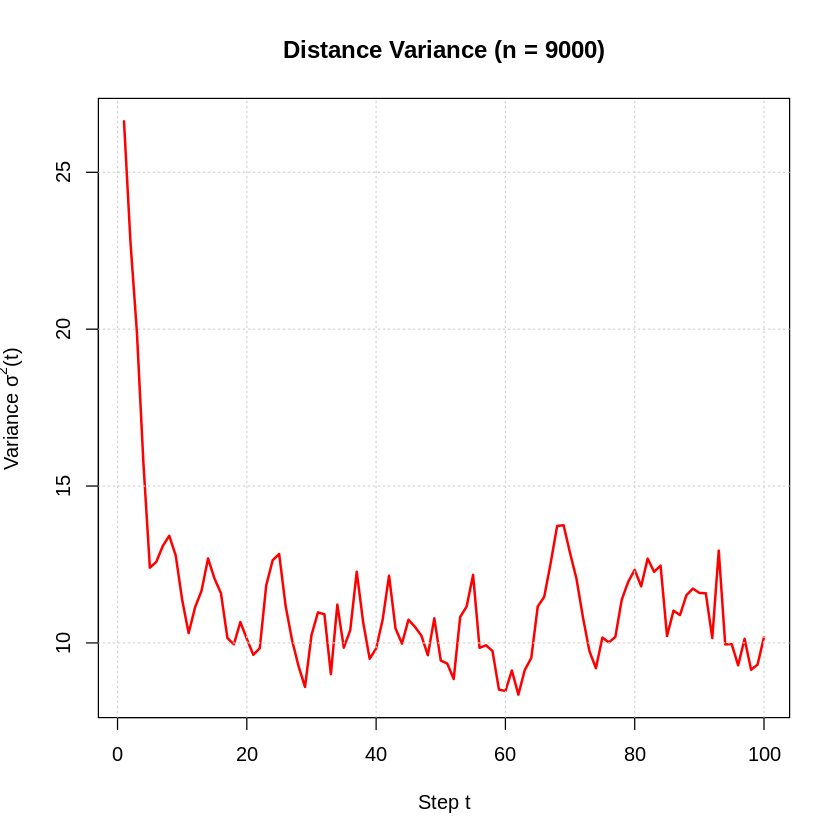

In [ ]:
# ---------------------------
# Q2(d): Define a function to perform multiple random walks and compute stats
# ---------------------------

# ----- Random Walk Function -----
random_walk_distance <- function(graph, start_node, steps = 100) {
  current_node <- start_node
  dist_vec <- numeric(steps)

  for (t in 1:steps) {
    nbrs <- neighbors(graph, current_node)
    if (length(nbrs) == 0) {
      dist_vec[t:steps] <- NA
      break
    }
    next_node <- sample(nbrs, 1)
    d <- distances(graph, v = start_node, to = next_node)[1, 1]
    dist_vec[t] <- d
    current_node <- next_node
  }
  return(dist_vec)
}

# ----- Multiple Random Walk Analysis -----
analyze_random_walk <- function(graph, num_walks = 100, max_steps = 100) {
  set.seed(42)
  walk_results <- matrix(NA, nrow = num_walks, ncol = max_steps)

  for(i in 1:num_walks) {
    start <- sample(V(graph), 1)
    walk_results[i, ] <- random_walk_distance(graph, start, steps = max_steps)
  }

  avg_distance <- apply(walk_results, 2, mean, na.rm = TRUE)
  var_distance <- apply(walk_results, 2, var, na.rm = TRUE)
  return(list(avg = avg_distance, var = var_distance))
}

# ----- Generate PA Networks for n = 90 and n = 9000 (m = 1) -----
pa_graph_90 <- sample_pa(n = 90, m = 1, directed = FALSE)
pa_graph_9000 <- sample_pa(n = 9000, m = 1, directed = FALSE)

cat("PA Network (n = 90):\n")
cat("  Number of nodes:", vcount(pa_graph_90), "\n")
cat("  Number of edges:", ecount(pa_graph_90), "\n")
diam_90 <- diameter(pa_graph_90)
cat("  Diameter:", diam_90, "\n\n")

cat("PA Network (n = 9000):\n")
cat("  Number of nodes:", vcount(pa_graph_9000), "\n")
cat("  Number of edges:", ecount(pa_graph_9000), "\n")
diam_9000 <- diameter(pa_graph_9000)
cat("  Diameter:", diam_9000, "\n\n")

# ----- Visualization-----
plot(pa_graph_90, vertex.label = "", vertex.size = 4,
     main = "PA Network (90 nodes, m = 1)")

plot(pa_graph_9000, vertex.label = "", vertex.size = 4,
     main = "PA Network (9000 nodes, m = 1)")

# ----- Perform Random Walk Analysis -----
max_steps <- 100
result_90 <- analyze_random_walk(pa_graph_90, num_walks = 100, max_steps = max_steps)
result_9000 <- analyze_random_walk(pa_graph_9000, num_walks = 100, max_steps = max_steps)



# For PA network with n = 90: Average Distance vs. Steps
plot(1:max_steps, result_90$avg, type = "l", lwd = 2, col = "blue",
     xlab = "Step t", ylab = "Average distance ⟨s(t)⟩",
     main = "Avg Distance (n = 90)",
     xlim = c(1, max_steps))
grid()

# For PA network with n = 90: Variance vs. Steps
plot(1:max_steps, result_90$var, type = "l", lwd = 2, col = "red",
     xlab = "Step t", ylab = expression(paste("Variance ", sigma^2, "(t)")),
     main = "Distance Variance (n = 90)",
     xlim = c(1, max_steps))
grid()

# For PA network with n = 9000: Average Distance vs. Steps
plot(1:max_steps, result_9000$avg, type = "l", lwd = 2, col = "blue",
     xlab = "Step t", ylab = "Average distance ⟨s(t)⟩",
     main = "Avg Distance (n = 9000)",
     xlim = c(1, max_steps))
grid()

# For PA network with n = 9000: Variance vs. Steps
plot(1:max_steps, result_9000$var, type = "l", lwd = 2, col = "red",
     xlab = "Step t", ylab = expression(paste("Variance ", sigma^2, "(t)")),
     main = "Distance Variance (n = 9000)",
     xlim = c(1, max_steps))
grid()




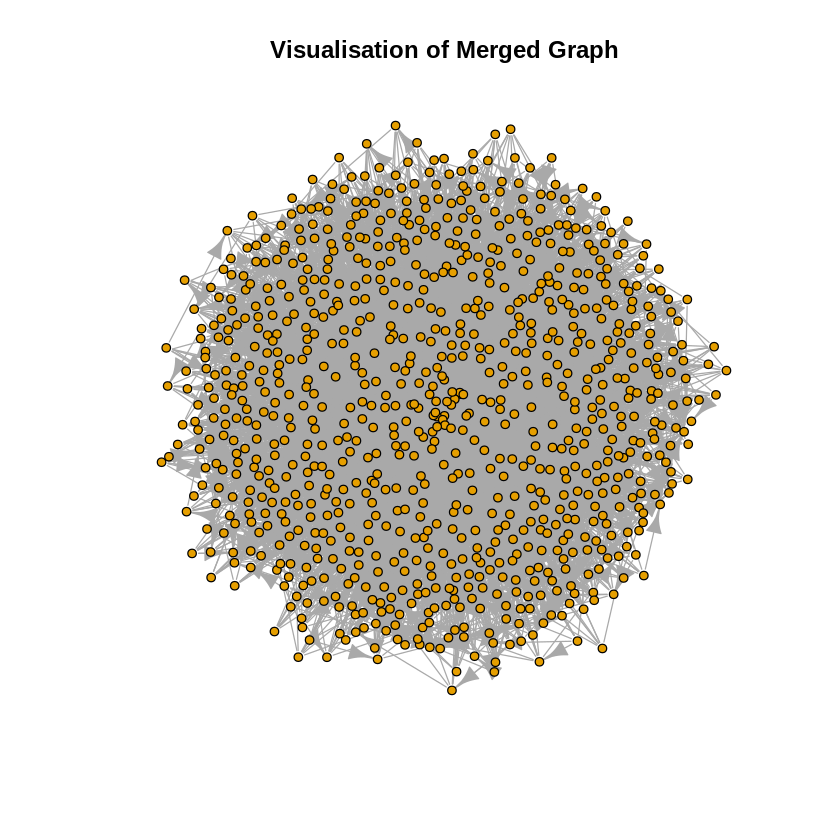

In [ ]:
# Q3: Generate and Visualize Merged Graph

g1 <- sample_pa(n = 900, m = 4, directed = TRUE)
g2 <- sample_pa(n = 900, m = 4, directed = TRUE)

edges_g2 <- as_edgelist(g2, names = FALSE)
perm <- sample(1:vcount(g2))
edges_g2_shuffled <- cbind(perm[edges_g2[,1]], perm[edges_g2[,2]])

merged_edges <- rbind(as_edgelist(g1, names = FALSE), edges_g2_shuffled)
g_merged <- graph_from_edgelist(merged_edges, directed = TRUE)

plot(g_merged, vertex.label = "", vertex.size = 3,
     main = "Visualisation of Merged Graph")


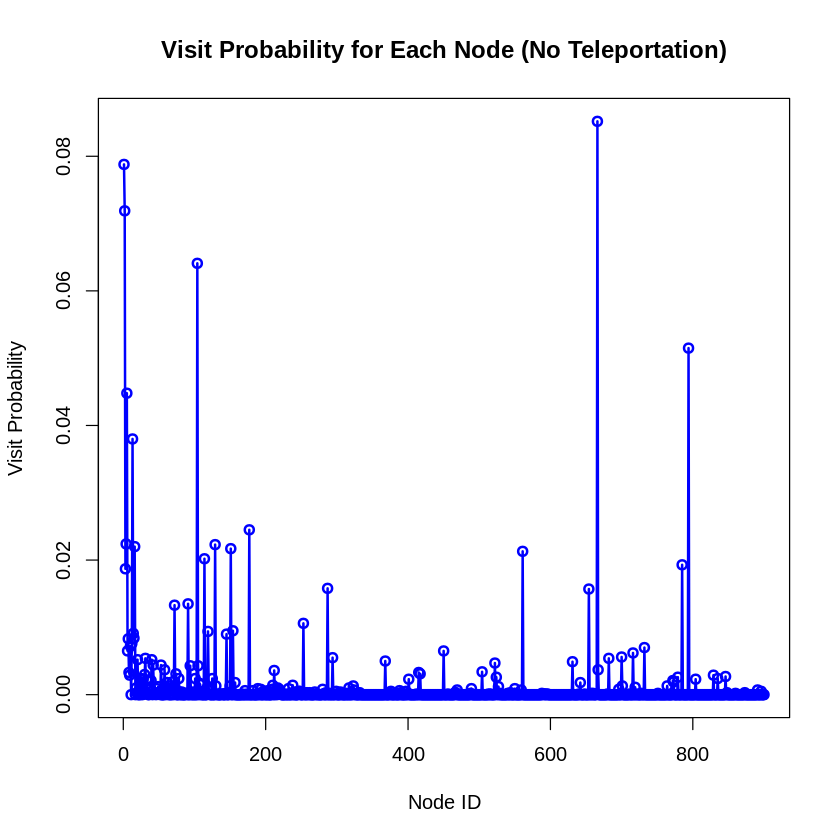

Correlation between in-degree and visit probability:  0.8790123 


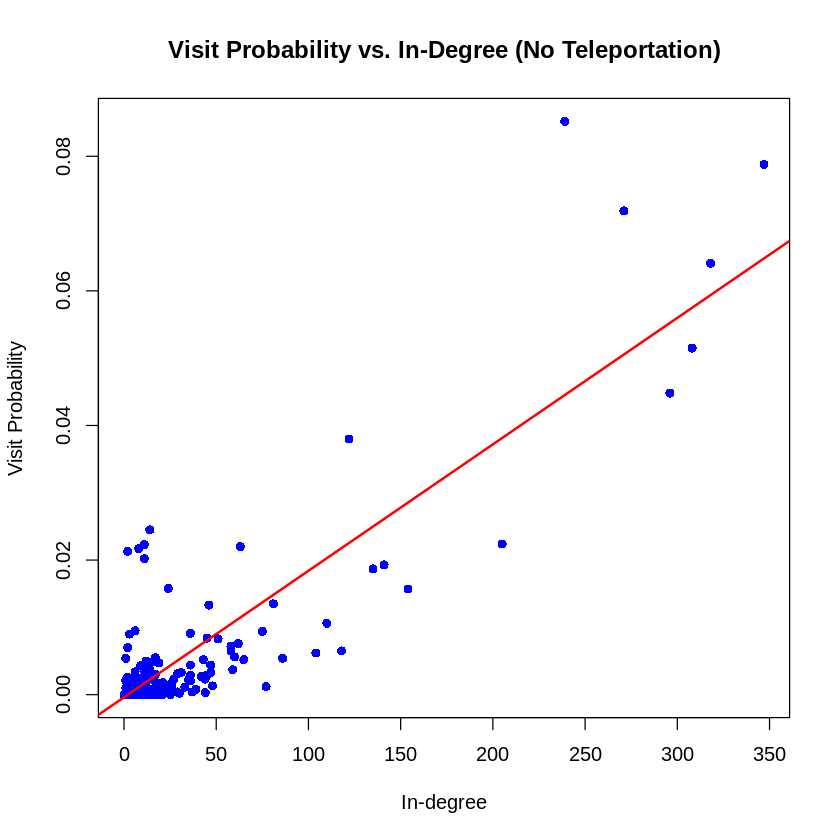

In [ ]:
# Q3(a): Random Walk without Teleportation

# --- Random Walk Simulation Function (Without Teleportation) ---
simulate_random_walk <- function(graph, steps, start_node = NULL) {
  if (is.null(start_node)) {
    current <- sample(V(graph), 1)
  } else {
    current <- start_node
  }

  visits <- numeric(vcount(graph))
  visits[current] <- visits[current] + 1
  for (i in 1:steps) {
    out_neigh <- neighbors(graph, current, mode = "out")
    if (length(out_neigh) == 0) {
      visits[current] <- visits[current] + 1
      next
    }
    current <- sample(out_neigh, 1)
    visits[current] <- visits[current] + 1
  }
  prob <- visits / sum(visits)
  return(prob)
}

set.seed(42)
steps <- 10000
simulated_prob <- simulate_random_walk(g_merged, steps)

plot(simulated_prob, type = "o", col = "blue", lwd = 2,
     xlab = "Node ID", ylab = "Visit Probability",
     main = "Visit Probability for Each Node (No Teleportation)")

in_degrees <- degree(g_merged, mode = "in")

plot(in_degrees, simulated_prob,
     xlab = "In-degree", ylab = "Visit Probability",
     main = "Visit Probability vs. In-Degree (No Teleportation)",
     pch = 16, col = "blue")
abline(lm(simulated_prob ~ in_degrees), col = "red", lwd = 2)

cor_value <- cor(in_degrees, simulated_prob)
cat("Correlation between in-degree and visit probability: ", cor_value, "\n")


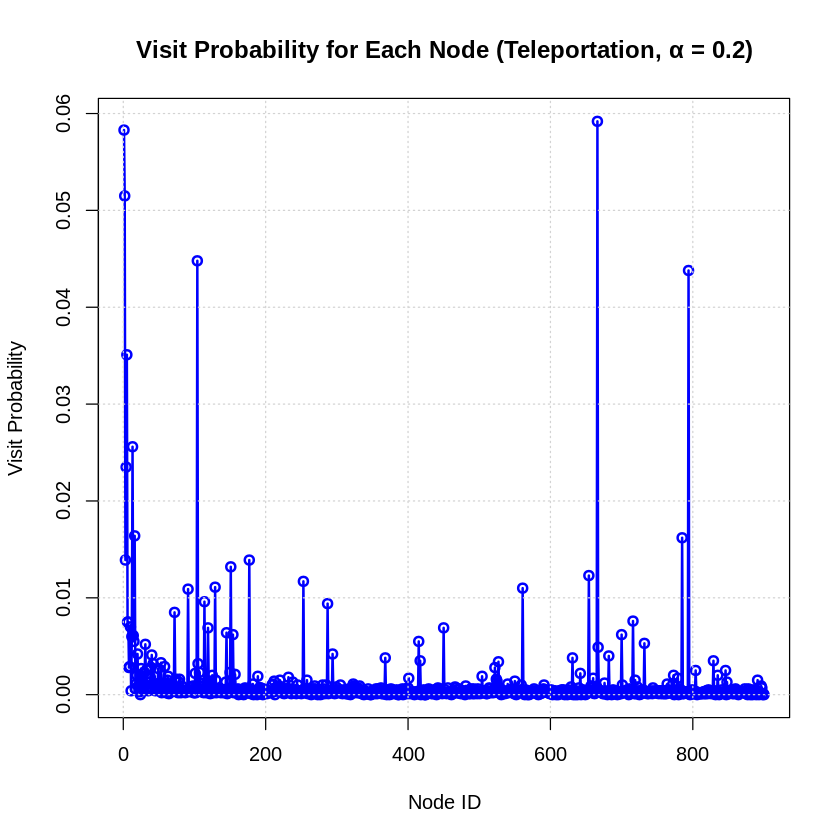

Correlation (with teleportation): 0.9241808 


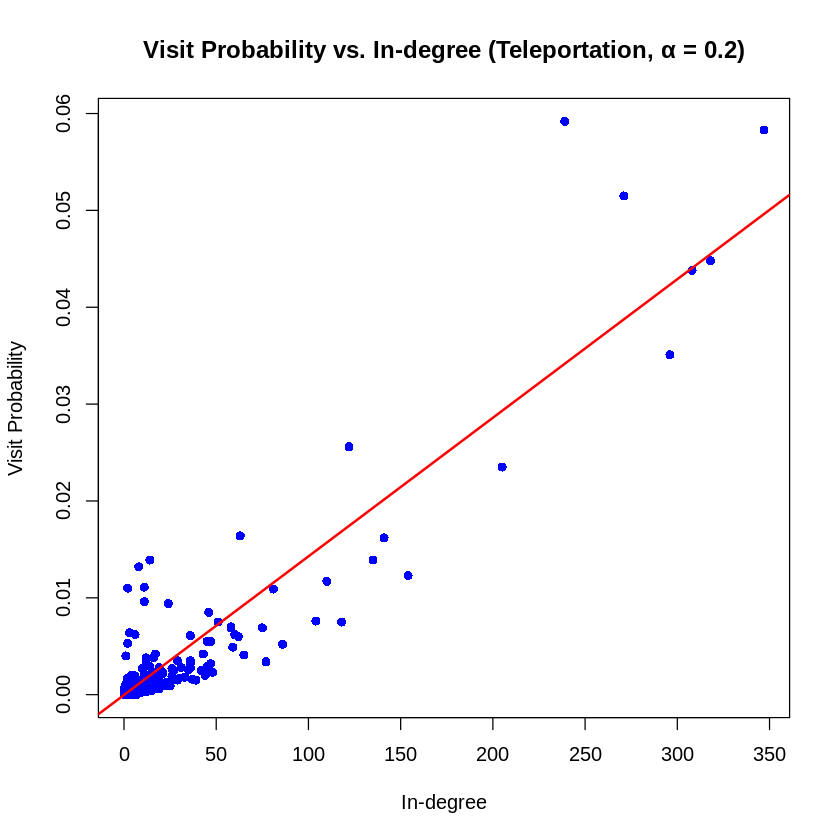

In [ ]:
# ===============================
# Q3(b): Random Walk Simulation with Teleportation (α = 0.2)
# ===============================
simulate_random_walk_teleport <- function(graph, steps, alpha = 0.2, start_node = NULL) {
  if (is.null(start_node)) {
    current <- sample(V(graph), 1)
  } else {
    current <- start_node
  }

  visits <- numeric(vcount(graph))
  visits[current] <- visits[current] + 1
  for (i in 1:steps) {
    if (runif(1) < alpha) {
      current <- sample(V(graph), 1)
    } else {
      out_neigh <- neighbors(graph, current, mode = "out")
      if (length(out_neigh) == 0) {
        current <- sample(V(graph), 1)
      } else {
        current <- sample(out_neigh, 1)
      }
    }
    visits[current] <- visits[current] + 1
  }
  prob <- visits / sum(visits)
  return(prob)
}

set.seed(42)
steps <- 10000
alpha <- 0.2

sim_prob_tp <- simulate_random_walk_teleport(g_merged, steps, alpha)

plot(sim_prob_tp, type = "o", col = "blue", lwd = 2,
     xlab = "Node ID", ylab = "Visit Probability",
     main = "Visit Probability for Each Node (Teleportation, α = 0.2)")
grid()

in_degrees <- degree(g_merged, mode = "in")

plot(in_degrees, sim_prob_tp,
     xlab = "In-degree", ylab = "Visit Probability",
     main = "Visit Probability vs. In-degree (Teleportation, α = 0.2)",
     col = "blue", pch = 16)

abline(lm(sim_prob_tp ~ in_degrees), col = "red", lwd = 2)

cor_tp <- cor(in_degrees, sim_prob_tp)
cat("Correlation (with teleportation):", cor_tp, "\n")


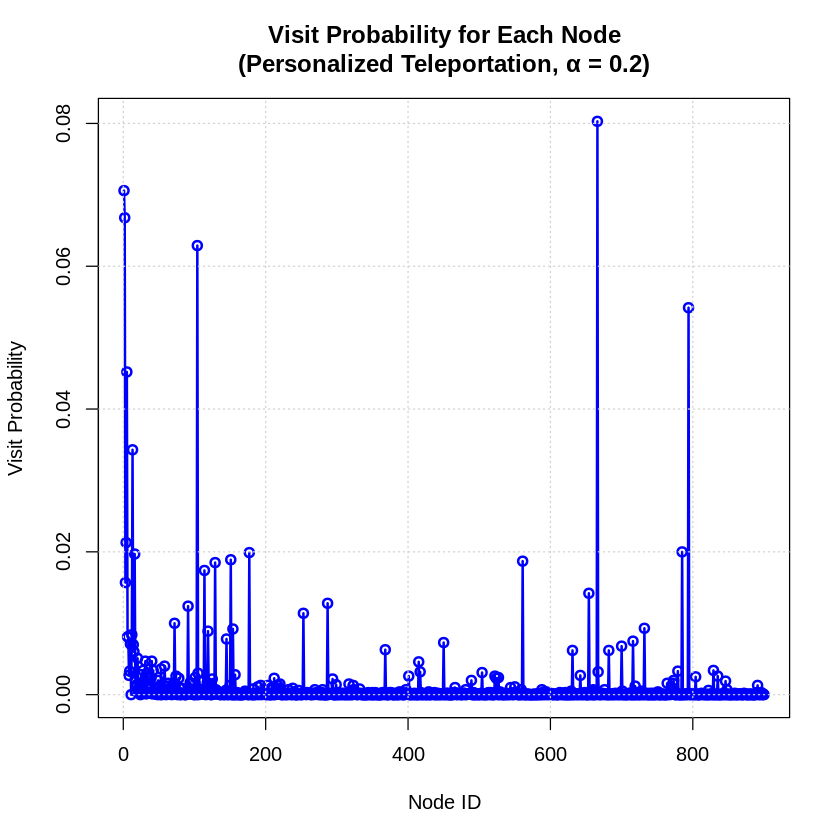

Correlation between in-degree and visit probability (personalized): 0.8949519 


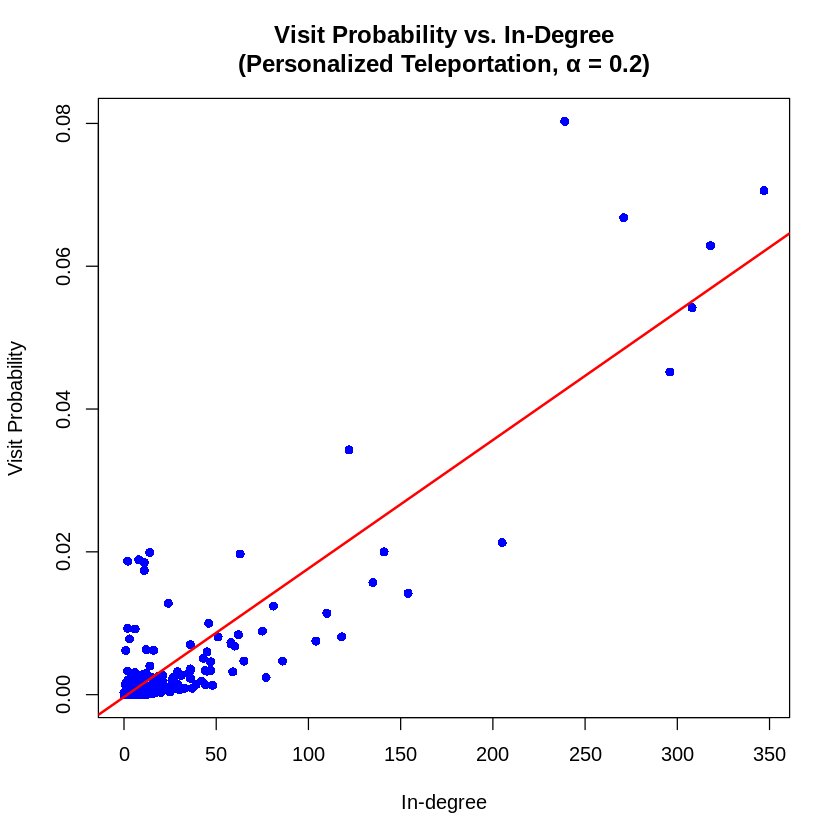

In [ ]:
# ===============================
# Q4(a): Personalized PageRank Simulation (Teleportation with Personalized Distribution)
# ===============================
pr_result <- page_rank(g_merged, damping = 0.85)
pr_vec <- pr_result$vector
simulate_personalized_random_walk <- function(graph, steps, alpha = 0.2, start_node = NULL) {
  if (is.null(start_node)) {
    current <- sample(V(graph), 1)
  } else {
    current <- start_node
  }
  visits <- numeric(vcount(graph))
  visits[current] <- visits[current] + 1
  for (i in 1:steps) {
    if (runif(1) < alpha) {
      current <- sample(V(graph), 1, prob = pr_vec)
    } else {
      out_neigh <- neighbors(graph, current, mode = "out")
      if (length(out_neigh) == 0) {
        current <- sample(V(graph), 1, prob = pr_vec)
      } else {
        current <- sample(out_neigh, 1)
      }
    }
    visits[current] <- visits[current] + 1
  }
  prob <- visits / sum(visits)
  return(prob)
}
set.seed(42)
steps <- 10000
alpha <- 0.2
simulated_prob_personalized <- simulate_personalized_random_walk(g_merged, steps, alpha)
plot(simulated_prob_personalized, type = "o", col = "blue", lwd = 2,
     xlab = "Node ID", ylab = "Visit Probability",
     main = "Visit Probability for Each Node\n(Personalized Teleportation, α = 0.2)")
grid()
in_degrees <- degree(g_merged, mode = "in")

plot(in_degrees, simulated_prob_personalized,
     xlab = "In-degree", ylab = "Visit Probability",
     main = "Visit Probability vs. In-Degree\n(Personalized Teleportation, α = 0.2)",
     col = "blue", pch = 16)
abline(lm(simulated_prob_personalized ~ in_degrees), col = "red", lwd = 2)
cor_value <- cor(in_degrees, simulated_prob_personalized)
cat("Correlation between in-degree and visit probability (personalized):", cor_value, "\n")


Nodes with median PageRank values: 312 322 
Their PageRank values: 0.0002039648 0.0002041648 


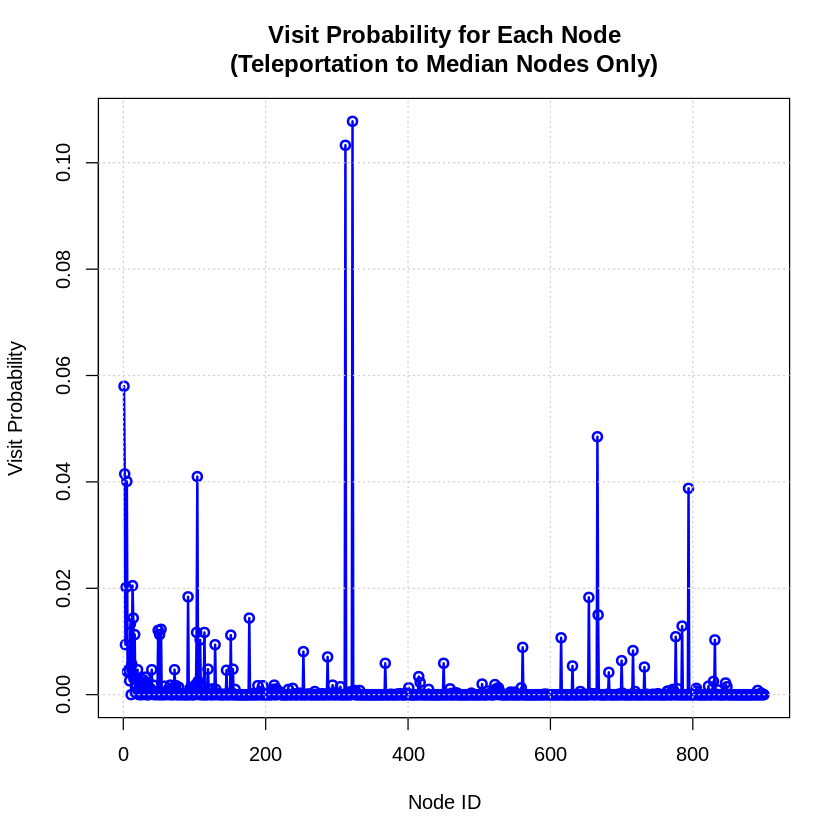

Correlation (Teleportation to Median Nodes): 0.5833727 


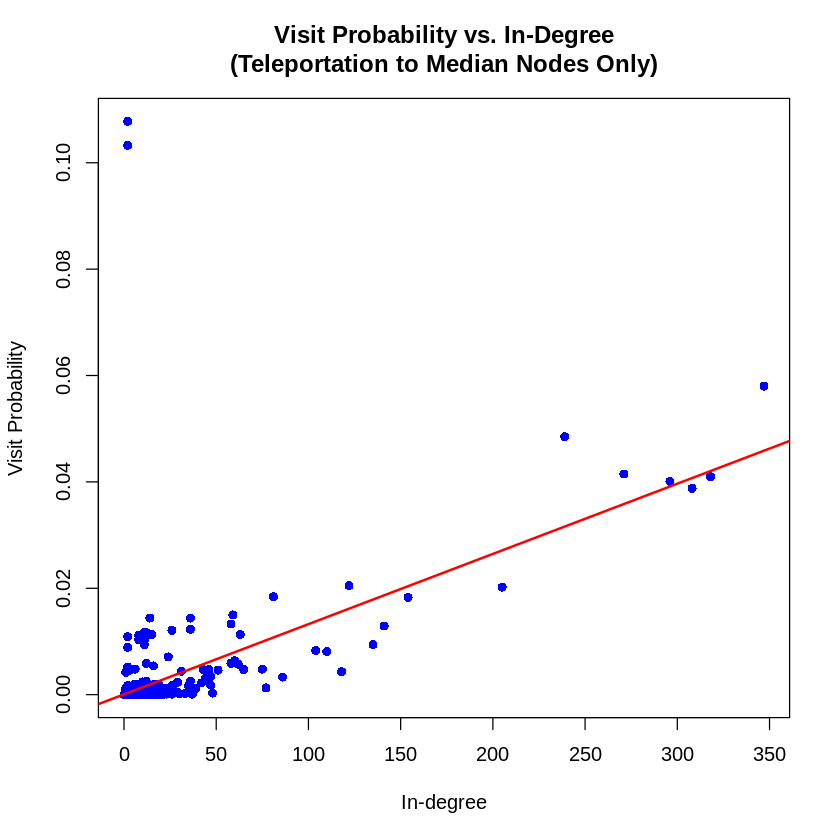

In [ ]:
# ===============================
# Q4(b): Personalized Teleportation to Median Nodes Only
# ===============================

median_val <- median(pr_vec)
diffs <- abs(pr_vec - median_val)
order_indices <- order(diffs)
median_nodes <- order_indices[1:2]
cat("Nodes with median PageRank values:", median_nodes, "\n")
cat("Their PageRank values:", pr_vec[median_nodes], "\n")

simulate_random_walk_teleport_median <- function(graph, steps, alpha = 0.2, median_nodes, start_node = NULL) {
  if (is.null(start_node)) {
    current <- sample(V(graph), 1)
  } else {
    current <- start_node
  }
  visits <- numeric(vcount(graph))
  visits[current] <- visits[current] + 1


  for (i in 1:steps) {
    if (runif(1) < alpha) {
      current <- sample(median_nodes, 1)
    } else {
      out_neigh <- neighbors(graph, current, mode = "out")
      if (length(out_neigh) == 0) {
        current <- sample(median_nodes, 1)
      } else {
        current <- sample(out_neigh, 1)
      }
    }
    visits[current] <- visits[current] + 1
  }
  prob <- visits / sum(visits)
  return(prob)
}

set.seed(42)
steps <- 10000
simulated_prob_median <- simulate_random_walk_teleport_median(g_merged, steps, alpha = 0.2, median_nodes)

plot(simulated_prob_median, type = "o", col = "blue", lwd = 2,
     xlab = "Node ID", ylab = "Visit Probability",
     main = "Visit Probability for Each Node\n(Teleportation to Median Nodes Only)")
grid()

in_degrees <- degree(g_merged, mode = "in")
plot(in_degrees, simulated_prob_median,
     xlab = "In-degree", ylab = "Visit Probability",
     main = "Visit Probability vs. In-Degree\n(Teleportation to Median Nodes Only)",
     col = "blue", pch = 16)
abline(lm(simulated_prob_median ~ in_degrees), col = "red", lwd = 2)
cor_median <- cor(in_degrees, simulated_prob_median)
cat("Correlation (Teleportation to Median Nodes):", cor_median, "\n")
